# EDA PART 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('EDA_1.csv', sep=',')
data.head()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,GROUP,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,DRHO,LITHOLOGY,VSH
0,922572,2724.702000,450313.93750,6795994.0,BAAT GP.,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,9.107889,83.988472,59.014019,-0.018337,Sandstone,0.089237
1,320996,2621.822805,454469.53125,6603730.0,ROGALAND GP.,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,4.117731,81.420059,59.014019,0.001239,Sandstone,0.054281
2,728745,2637.138000,437780.34375,6791573.5,BAAT GP.,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,6.058303,103.821838,61.254036,-0.059639,Sandstone,0.085962
3,582075,1992.700979,526935.68750,6758512.0,VIKING GP.,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,3.794930,104.682312,66.092003,-0.011558,Sandstone,0.068806
4,191006,2198.375197,466874.18750,6479870.5,VIKING GP.,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,6.058303,94.435440,39.258499,0.024615,Sandstone,0.245766


# CLUSTERING

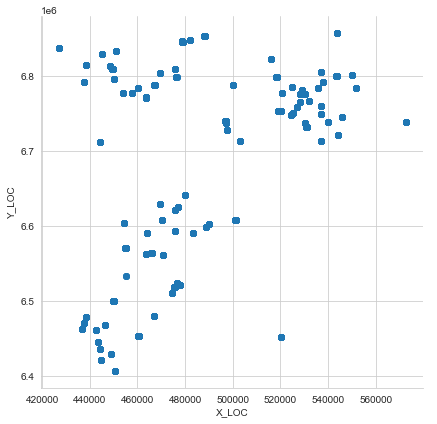

In [3]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(data,
              height = 6).map(plt.scatter,
                              'X_LOC',
                              'Y_LOC').add_legend()

# METODO ELBOW

In [4]:
df_Short = data[['X_LOC','Y_LOC']]
df_Short.head()

,X_LOC,Y_LOC
0,450313.93750,6795994.0
1,454469.53125,6603730.0
2,437780.34375,6791573.5
3,526935.68750,6758512.0
4,466874.18750,6479870.5


In [5]:
import sklearn.cluster as cluster
K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [6]:
mycenters = pd.DataFrame({'Clusters' : K, 'Valor' : wss})
mycenters

,Clusters,Valor
0,1,8.910671e+14
1,2,1.657086e+14
2,3,7.686311e+13
3,4,5.654932e+13
4,5,3.910675e+13
5,6,2.776946e+13
6,7,2.122817e+13
7,8,1.610951e+13
8,9,1.381677e+13
9,10,1.186758e+13


<AxesSubplot:xlabel='Clusters', ylabel='Valor'>

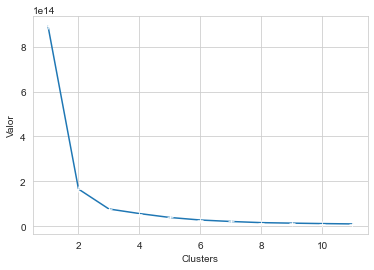

In [7]:
sns.lineplot(x = 'Clusters', y = 'Valor', data = mycenters, marker="+")

In [8]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = cluster.fit_predict(df_Short)
print(clusters)

[1 0 1 ... 0 0 0]


In [9]:
data['CLUSTER'] = clusters
data.head()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,GROUP,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,DRHO,LITHOLOGY,VSH,CLUSTER
0,922572,2724.702000,450313.93750,6795994.0,BAAT GP.,11.581571,0.366497,1.163781,0.918190,2.356852,78.766212,0.205796,9.107889,83.988472,59.014019,-0.018337,Sandstone,0.089237,1
1,320996,2621.822805,454469.53125,6603730.0,ROGALAND GP.,18.109400,9.968602,0.797137,0.878440,2.277410,30.843834,0.282925,4.117731,81.420059,59.014019,0.001239,Sandstone,0.054281,0
2,728745,2637.138000,437780.34375,6791573.5,BAAT GP.,11.879846,2.809250,1.766732,1.737608,2.205797,38.775616,0.323573,6.058303,103.821838,61.254036,-0.059639,Sandstone,0.085962,1
3,582075,1992.700979,526935.68750,6758512.0,VIKING GP.,11.914101,1.580701,0.820026,0.544555,2.150259,39.672600,0.337625,3.794930,104.682312,66.092003,-0.011558,Sandstone,0.068806,1
4,191006,2198.375197,466874.18750,6479870.5,VIKING GP.,12.554856,1.318956,1.326310,1.415055,2.440757,59.876221,0.308275,6.058303,94.435440,39.258499,0.024615,Sandstone,0.245766,0


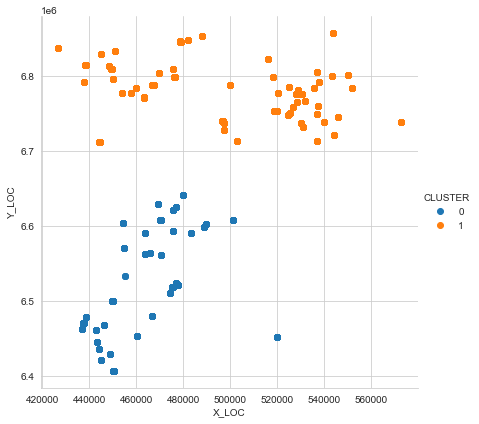

In [11]:
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(data, hue ="CLUSTER",
              height = 6).map(plt.scatter,
                              'X_LOC',
                              'Y_LOC').add_legend()

In [ ]:
data.to_csv('EDA_2.csv')